In [ ]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
#Leitura e visualização dos dados
avcData=pd.read_csv("base1final.csv")
avcData.head()

,IDNO,GEND01,MARIT01,OCCUP01,CUROC01,INCOME01,HEALT01,RLHLTH01,BED01,LUNG01,...,UAZQTD06,UAZQTP06,URCOS06,VASO06,VASOD06,VERIR06,VERSR06,WARF06,WTLS06,XOI06
0,100051,0.0,1.0,5.0,2.0,5.0,4.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100425,1.0,2.0,1.0,4.0,8.0,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100434,0.0,1.0,1.0,6.0,5.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,101032,1.0,1.0,3.0,4.0,5.0,4.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,101090,0.0,1.0,5.0,2.0,5.0,4.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Dimensão da tabela
avcData.shape

(5201, 642)

# **Pré-processamento**

In [ ]:
#Removendo id
avcData.drop('IDNO', axis = 1, inplace=True)

In [ ]:
avcData

,GEND01,MARIT01,OCCUP01,CUROC01,INCOME01,HEALT01,RLHLTH01,BED01,LUNG01,NERV01,...,UAZQTD06,UAZQTP06,URCOS06,VASO06,VASOD06,VERIR06,VERSR06,WARF06,WTLS06,XOI06
0,0.0,1.0,5.0,2.0,5.0,4.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2.0,1.0,4.0,8.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,6.0,5.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,3.0,4.0,5.0,4.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,5.0,2.0,5.0,4.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5196,0.0,1.0,2.0,6.0,3.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5197,1.0,1.0,1.0,4.0,5.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5198,0.0,1.0,6.0,2.0,NaN,5.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5199,0.0,1.0,5.0,2.0,NaN,3.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#verificando dados Faltantes
avcData.isnull().sum()

GEND01       76
MARIT01      82
OCCUP01      84
CUROC01     202
INCOME01    414
           ... 
VERIR06      86
VERSR06      86
WARF06       86
WTLS06       86
XOI06        86
Length: 641, dtype: int64

In [ ]:
avcData.duplicated().sum()

75

In [ ]:
#Verificando e removendo dados duplicados
avc = avcData.drop_duplicates()

In [ ]:
#Dimensão da tabela
avc.shape

(5126, 641)

In [ ]:
#Verificando dados da varialvel classe
avc['STRKBASE'].value_counts()

0.0    4882
1.0     137
2.0     106
Name: STRKBASE, dtype: int64

In [ ]:
#removendo dados faltosos da classe
newAVCData = avcData.loc[avcData['STRKBASE'].notnull()]

In [ ]:
#verificando o tamanho
newAVCData.shape

(5125, 641)

In [ ]:
#verificando o describe
newAVCData.describe()

,GEND01,MARIT01,OCCUP01,CUROC01,INCOME01,HEALT01,RLHLTH01,BED01,LUNG01,NERV01,...,UAZQTD06,UAZQTP06,URCOS06,VASO06,VASOD06,VERIR06,VERSR06,WARF06,WTLS06,XOI06
count,5125.000000,5119.000000,5117.000000,4999.000000,4787.000000,5115.000000,4816.000000,5120.000000,5094.000000,5104.000000,...,5115.00000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.0,5115.000000
mean,0.432585,1.471186,2.865742,3.724545,5.005431,2.734702,1.456188,0.104492,0.094229,0.088558,...,0.04868,0.014858,0.005083,0.059824,0.015054,0.012121,0.021505,0.017009,0.0,0.025220
std,0.495483,0.901943,1.816588,1.568861,1.951023,1.041098,0.561994,0.793002,0.292175,0.284133,...,0.21522,0.120997,0.071121,0.237184,0.121779,0.109438,0.145076,0.129317,0.0,0.156808
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,1.000000,1.000000,2.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,1.000000,2.000000,4.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,1.000000,2.000000,5.000000,4.000000,6.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,1.000000,5.000000,6.000000,8.000000,8.000000,5.000000,3.000000,14.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [ ]:
newAVCData['ATRFIB07'].value_counts()

0.0    3670
1.0     197
Name: ATRFIB07, dtype: int64

In [ ]:
#Seleção dos atributos
#Pressão, Fibrilação Atrial, Tabagismo, *Colesterol, Diabetes, IMC, Histórico na Família, Frequência Cardíaca, *Arritmia Cardíaca, Defeitos na visão, Desmaio, Tontura,
#Paralisia facial, Perda de sensação, Dificuldades para falar, Fraqueza, Desconforto no peito, Paralisia dos membros inferiores,
#Paralisia de membros superiores, Vômito, Dor de cabeça, Confusão mental, fadiga, Perda de audição, Perda de equilíbrio

#Pressão alta = HIBP01
#Glicose
#Peso
#altura
#idade

#SUPSYS16 - Pressao arterial SISTÓLICA (numeric)
#SUPDIA16 - Pressao arterial DIASTÓLICA (numeric)
#ATRFIB07 - Fibrilação atrial (0,1)
#DIABETES - Diabetes (1,2,3)
#BMI - IMC (numeric)
#FHSTK - histórico de AVC na família (0,1)
#BEAT14 - Frequencia cardica (numeric)
#HEAR01 - doença no pulmão (0,1)
#NERV01 - transtorno nervoso (0,1)
#KIDNEY01 - doença renal (0,1)
#DIAG01 - diagnóstico com cancer (0,1)
#HEART01 - doença cardíaca (0,1)
#GEND01 - genero
#SMOKE - Status fumante (1,2,3)

#DIZZYP07 - tontura (0,1)
#NAUSEP07 - nausea (0,1)
#FATIGP07 = fadiga (0,1)
#RECOGN08 - Consegue ver bem o suficiente para reconhecer (0,1)
#CHSTPN07 - dor/desconforto no peito (0,1)
#LEGWLK07 - dor nas pernas ao andar (0,1)
#PALPIP07 - palpitações (0,1)
#CONVER08 - escuta bem para conversar (0,1)
#LIFTNG09 - difiuldade para levantar (0,1,2)
#WHOME09 - dificuldades para andar pela casa (0,1)

#STRKBASE - classe (0,1,2)

attributes = ["GEND01", "SUPSYS16", "SUPDIA16", "ATRFIB07", "DIABETES", "BMI", "FHSTK", "BEAT14", "HEAR01",
              "NERV01", "KIDNEY01", "DIAG01", 'HEART01', "SMOKE", 'DIZZYP07', "NAUSEP07", "FATIGP07",
              "RECOGN08", "CHSTPN07", "LEGWLK07", "PALPIP07", "CONVER08", "LIFTNG09", "WHOME09", "STRKBASE"]
AvcData = newAVCData[attributes]

In [ ]:
#Quantidade variaveis com valores nulos
AvcData.isnull().any().sum()

22

In [ ]:
AvcData.isnull().sum().sort_values(ascending = False)

ATRFIB07    1258
FHSTK        438
CONVER08     212
HEART01      117
WHOME09       93
SUPDIA16      72
LIFTNG09      49
PALPIP07      48
RECOGN08      46
SUPSYS16      43
FATIGP07      38
KIDNEY01      35
DIZZYP07      26
HEAR01        25
NAUSEP07      24
LEGWLK07      22
NERV01        21
BMI           16
BEAT14        12
DIAG01         9
CHSTPN07       8
SMOKE          3
GEND01         0
DIABETES       0
STRKBASE       0
dtype: int64

<Axes: ylabel='Frequency'>

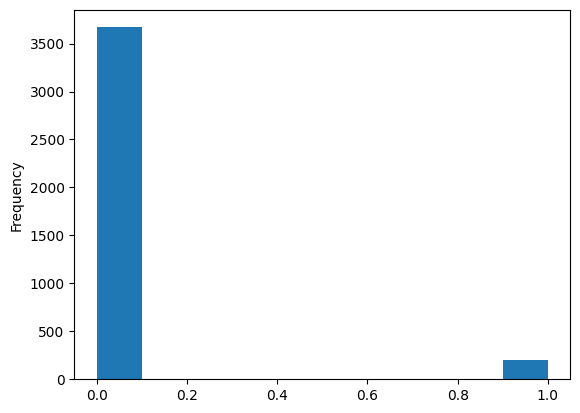

In [ ]:
AvcData['ATRFIB07'].plot(kind='hist')

In [ ]:
AvcData[AvcData['SMOKE'].isnull()].head()

,GEND01,SUPSYS16,SUPDIA16,ATRFIB07,DIABETES,BMI,FHSTK,BEAT14,HEAR01,NERV01,...,NAUSEP07,FATIGP07,RECOGN08,CHSTPN07,LEGWLK07,PALPIP07,CONVER08,LIFTNG09,WHOME09,STRKBASE
3594,0.0,164.0,60.0,NaN,2.0,24.529182,0.0,38.0,NaN,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4340,1.0,134.0,74.0,NaN,2.0,21.094128,0.0,30.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,2.0
5147,1.0,150.0,82.0,NaN,1.0,29.238684,NaN,31.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [ ]:
#Tratando valores faltosos
fibrilacaoAtrial = AvcData.ATRFIB07.median()
AvcData.fillna(fibrilacaoAtrial, inplace=True)
AvcData.ATRFIB07.isnull().sum()

<ipython-input-19-8f3a75334469>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AvcData.fillna(fibrilacaoAtrial, inplace=True)


0

In [ ]:
AvcData.ATRFIB07.isnull().sum()

0

In [ ]:
#AvcData['STRKBASE'].replace(2.0, 1.0, inplace = True);

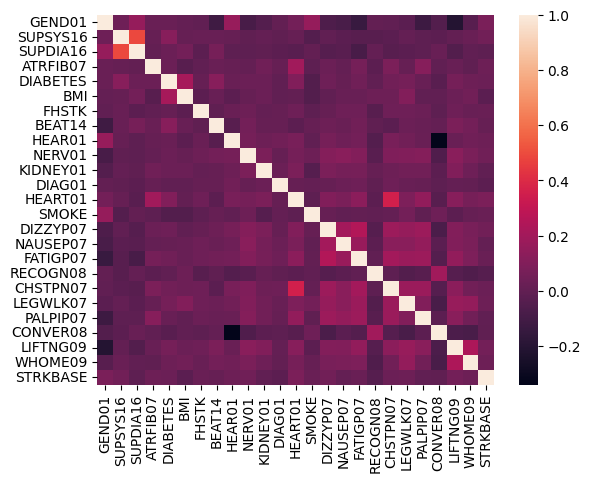

In [ ]:
import seaborn as sns
sns.heatmap(AvcData.corr()); #Correlation Heatmap

In [ ]:
AvcData

,GEND01,SUPSYS16,SUPDIA16,ATRFIB07,DIABETES,BMI,FHSTK,BEAT14,HEAR01,NERV01,...,NAUSEP07,FATIGP07,RECOGN08,CHSTPN07,LEGWLK07,PALPIP07,CONVER08,LIFTNG09,WHOME09,STRKBASE
0,0.0,150.0,78.0,0.0,2.0,34.500000,0.0,37.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,116.0,76.0,0.0,1.0,32.059293,0.0,40.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,124.0,64.0,0.0,1.0,20.000000,1.0,30.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,164.0,82.0,0.0,1.0,23.678376,0.0,40.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,156.0,80.0,0.0,3.0,21.346278,0.0,32.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5196,0.0,178.0,74.0,0.0,1.0,21.005749,0.0,34.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5197,1.0,142.0,70.0,0.0,2.0,27.160081,1.0,31.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5198,0.0,0.0,0.0,0.0,3.0,30.528013,0.0,35.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5199,0.0,150.0,66.0,0.0,3.0,28.818315,0.0,36.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#salvando base pré processada
write = pd.ExcelWriter('avc_pre.xlsx')
AvcData.to_excel(write, 'novosdados', index = False)
write.save()

<ipython-input-23-8dad1a46ed83>:4: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  write.save()


In [ ]:
#Leitura e visualização dos dados
avcData=pd.read_excel("avc_pre.xlsx")

In [ ]:
avcData.shape

(5125, 25)

In [ ]:
#Seleção do atributos (Random forest)
# usamos X para os valores das entradas e y para os valores das saídas(atributo classificador)
X = avcData.drop('STRKBASE', axis = 1)
y = avcData["STRKBASE"]

In [ ]:
#Definindo o conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#Balanceamento
smt = SMOTE()

In [ ]:
X_smt, y_smt = smt.fit_resample(X, y)

In [ ]:
y_smt.shape

(14646,)

In [ ]:
X_smt

,GEND01,SUPSYS16,SUPDIA16,ATRFIB07,DIABETES,BMI,FHSTK,BEAT14,HEAR01,NERV01,...,DIZZYP07,NAUSEP07,FATIGP07,RECOGN08,CHSTPN07,LEGWLK07,PALPIP07,CONVER08,LIFTNG09,WHOME09
0,0,150,78,0,2,34.500000,0,37,0,0,...,0,0,0,1,0,0,1,1,0,0
1,1,116,76,0,1,32.059293,0,40,0,0,...,1,0,1,1,1,1,0,1,0,0
2,0,124,64,0,1,20.000000,1,30,1,0,...,0,0,1,1,1,0,0,1,0,0
3,1,164,82,0,1,23.678376,0,40,1,0,...,1,0,0,1,0,0,0,1,0,0
4,0,156,80,0,3,21.346278,0,32,0,0,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14641,1,123,66,0,1,22.911695,0,22,0,0,...,0,0,0,1,0,0,0,1,0,0
14642,0,157,30,0,1,20.359546,0,37,0,0,...,0,0,0,1,0,0,0,1,0,0
14643,1,105,55,0,1,26.238721,1,30,0,0,...,0,0,0,1,0,0,0,1,0,0
14644,0,154,78,0,1,23.732580,0,35,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_smt = pd.concat([pd.DataFrame(X_smt), pd.DataFrame(y_smt)], axis=1)
df_smt.columns = list(X.columns) + [y.name]

# Salvar a base de dados balanceada com SMOTE em um novo arquivo CSV
df_smt.to_csv('Basebalanceada.csv', index=False)

In [ ]:
AvcData.to_csv('BaseB.csv', index=False)

In [ ]:
#Leitura e visualização dos dados
avc=pd.read_csv("Basebalanceada.csv")


In [ ]:
avc

,GEND01,SUPSYS16,SUPDIA16,ATRFIB07,DIABETES,BMI,FHSTK,BEAT14,HEAR01,NERV01,...,NAUSEP07,FATIGP07,RECOGN08,CHSTPN07,LEGWLK07,PALPIP07,CONVER08,LIFTNG09,WHOME09,STRKBASE
0,0,150,78,0,2,34.500000,0,37,0,0,...,0,0,1,0,0,1,1,0,0,0
1,1,116,76,0,1,32.059293,0,40,0,0,...,0,1,1,1,1,0,1,0,0,0
2,0,124,64,0,1,20.000000,1,30,1,0,...,0,1,1,1,0,0,1,0,0,0
3,1,164,82,0,1,23.678376,0,40,1,0,...,0,0,1,0,0,0,1,0,0,0
4,0,156,80,0,3,21.346278,0,32,0,0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14641,1,166,80,0,2,26.445084,0,27,0,0,...,0,0,1,0,0,0,1,0,0,2
14642,0,159,81,0,1,28.825182,0,31,1,0,...,0,0,1,0,0,0,1,0,0,2
14643,0,124,75,0,1,25.795311,0,31,0,0,...,0,0,1,0,0,0,1,0,0,2
14644,0,124,50,0,1,24.739513,0,29,0,0,...,0,0,1,0,0,0,0,0,0,2


In [ ]:
avc['STRKBASE'].value_counts()

0    4882
1    4882
2    4882
Name: STRKBASE, dtype: int64